[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ciri/iese-dsfb/blob/main/notebooks/400-Airline-Text-Analytics.ipynb)

# Airline Text Analytics

### Strings

Text data always starts out in the form of a string. A **string** is a sequence (list) of **characters**. This includes the (English) alphanumeric characters and also special characters like white space, punctuation, etc. Other symbols, like emoticons, can also appear in your data, specially in social networks data. Besides that, you can also find letters from other languages (Spanish, Portuguese, etc) or alphabets (Cyrillic, hiragana, etc), and even ideographs (such as Han characters).

### Characters as numbers

There is a basic set of 127 characters, called the **ASCII characters**, which are encoded in the same way by all the computers, so you will never have trouble with them. They include the English letters (without accents), the numbers, basic punctuation (not curly quote marks or long dashes), white space, **control characters** such as the new line, represented in programming languages as `\n`, and other symbols familiar to you, such as the dollar ($) and the hash (#) symbols. The complete list can be easily found in Internet.

Non-ASCII characters can be encoded by different computers or different text editors in different ways. Mind that, if you capture string data on your own, you will probably find some of these characters in your data. Even when the documents are expected to be in English, they can be contaminated by other languages: Han
characters, German dieresis, Spanish eñe, etc. 

The preferred **encoding** is **UTF-8 (utf-8)**, which is the default encoding in Macintosh computers. Reading and writing text files in Pandas, the argument encoding allows you to manage both UTF-8 and the alternative encoding **Latin-1 (latin1)**. Windows computers use their own system, which is region specific. In US and Western Europe, this is **Windows-1252**, which is very close to Latin-1, though not exactly the same.

In [1]:
the_letter_A = chr(65)  # this
the_letter_A = 'A'      # is the same as this

the_letter_A 

'A'

In [2]:
for i in range(97,97+26):
    print(i, chr(i))

97 a
98 b
99 c
100 d
101 e
102 f
103 g
104 h
105 i
106 j
107 k
108 l
109 m
110 n
111 o
112 p
113 q
114 r
115 s
116 t
117 u
118 v
119 w
120 x
121 y
122 z


In [4]:
# This one is in Farsi, it may not render on your computer
print(chr(0x0604))

# This one is tradtional chinese
print(chr(0x9F8D))

؄
龍


### Strings as lists

Both lists and strings are **sequences**, so they share some core methods. A string can be regarded as a list of characters (letters, numbers, punctuation, etc). For instance, the function `len` gives you the number of characters of a string:

In [6]:
iese = 'IESE Business School'
iese

'IESE Business School'

In [7]:
print(len(iese))
print(iese[:4])

20
IESE


### Python string methods
Besides the methods shared with lists, Python has a collection of methods for manipulating strings:

* `lower()`: makes the string into all lowercase, this is useful when you're comparing strings and want to make the comparison case insensitive.
* `upper()`: same, but makes it uppercase
* `replace()`: replace a substring with something else, just like the usual "Find and Replace" method of text editors
* `split()`: splits a string into different segments (creates a list of segment strings). The split can be based on any separator. If no separator is specified, any whitespace string (containing only white space, line breaks or tabs) is a separator.
* `count()`: counts the number of occurrences of a pattern within a string:

In [8]:
name = 'Enric Junque de Fortuny'

print(name.upper(),name.lower())

ENRIC JUNQUE DE FORTUNY enric junque de fortuny


In [9]:
name.split(' ')

['Enric', 'Junque', 'de', 'Fortuny']

In [10]:
'---'.join(name.split(' '))

'Enric---Junque---de---Fortuny'

In [10]:
'---'.join(name.split()) # no args has a list of typical delimiters

'Enric---Junque---de---Fortuny'

# Airline Reviews

As part of an effort to better understand passenger satisfaction within the Star Alliance network, we analyze customer reviews from thousands of airline passengers both in and outside of network. The goal is to identify how factors like sentiment, seat type, travel purpose, and specific routes relate to overall recommendation rates.

The dataset includes 23,000+ reviews, with key variables such as:

- `Airline Name`: the name of the airline.
- `Route`: the flight route taken by the passenger.
- `Review`: free-text review written by the traveler.
- `Type Of Traveller`: e.g., Solo Leisure, Business, Couple.
- `Recommended`: whether the traveler recommends the airline (yes/no).
- `Seat Type`: seat class (e.g., Economy, Business).

Data Source: [Airlinequality.com](https://www.airlinequality.com/) via [Kaggle](https://www.kaggle.com/datasets/khushipitroda/airline-reviews/data)

### Importing the data

I've already partially cleaned it up for you (no duplicates), you can download it from [here](https://raw.githubusercontent.com/ciri/iese-dsfb/refs/heads/main/resources/text/Airline_Reviews.csv). Let us start by loading the CSV file that contains the data.

In [11]:
import pandas as pd
df = pd.read_csv('../resources/text/Airline_Reviews.csv')[['Airline Name','Route','Review','Type Of Traveller','Recommended','Seat Type']]
df.head()

,Airline Name,Route,Review,Type Of Traveller,Recommended,Seat Type
0,AB Aviation,Moroni to Moheli,Moroni to Moheli. Turned out to be a pretty ...,Solo Leisure,yes,Economy Class
1,AB Aviation,Moroni to Anjouan,Moroni to Anjouan. It is a very small airline...,Solo Leisure,no,Economy Class
2,AB Aviation,Anjouan to Dzaoudzi,Anjouan to Dzaoudzi. A very small airline an...,Solo Leisure,no,Economy Class
3,Adria Airways,Frankfurt to Pristina,Please do a favor yourself and do not fly wi...,Solo Leisure,no,Economy Class
4,Adria Airways,Sofia to Amsterdam via Ljubljana,Do not book a flight with this airline! My fr...,Couple Leisure,no,Economy Class


### Exploring the dataset

There's not much to describe or calculate here at first sight as it's all text so `df.describe()` won't be that usefull. Let's introduce `.value_counts()` which is a quick way to count categories in one column, like a faster `.groupby('status').count()`.

In [13]:
df.groupby('Seat Type').count()

,Airline Name,Route,Review,Type Of Traveller,Recommended
Seat Type,,,,,
Business Class,2097,1806,2097,1808,2097
Economy Class,19129,16747,19129,16829,19129
First Class,186,168,186,168,186
Premium Economy,646,608,646,613,646


In [18]:
df['Seat Type'].value_counts()

Seat Type
Economy Class      19129
Business Class      2097
Premium Economy      646
First Class          186
Name: count, dtype: int64

**You try it**

1) Create a dummy for whether or not a passenger recommends a particular flight/airline. 
2) Then, show the _recommendation rate_ per type of traveler.

### Exploring the review text

When a Pandas column contains string, we can access its **string methods**. Pandas string methods are vectorized versions of the above methods. They return a series of the same length, in which each term results from applying a string function to the corresponding term of `s`. The syntax of these functions is typically `s.str.fname(args)`, where `s` is a Pandas series of strings (or a list of strings) and args is a set of ad hoc arguments.

In [56]:
f_has_space = df.Review.str.lower().str.contains("space")

df[f_has_space].head(10)

,Airline Name,Route,Review,Type Of Traveller,Recommended,Seat Type,Recommended01
41,Adria Airways,Manchester to Ljubljana,Excellent flights both ways with Adria Airways...,Family Leisure,yes,Economy Class,True
100,Aegean Airlines,Athens to Chania,We took 3 flights with Aegean and would not r...,Couple Leisure,no,Economy Class,False
111,Aegean Airlines,Mytilini to Athens,Check-in uneventful. Boarding a zoo with a r...,Business,no,Economy Class,False
126,Aegean Airlines,Athens to Brussels,"Good things: usually rather new planes, dep...",Family Leisure,no,Economy Class,False
129,Aegean Airlines,Athens to Zurich,The first flight from Zurich to Athens was p...,Family Leisure,no,Economy Class,False
169,Aegean Airlines,Athens to Istanbul,The space for legs cannot be considered acce...,Business,no,Business Class,False
185,Aegean Airlines,Stuttgart to Heraklion,Nothing to complain about. Stuttgart to Hera...,Couple Leisure,yes,Economy Class,True
190,Aegean Airlines,Sofia to Thessaloniki via Athens,Zero arrangements for connection flights. My...,Solo Leisure,no,Economy Class,False
206,Aer Lingus,Cork to Dubrovnik,Cork to Dubrovnik return. Comfortable aircra...,Family Leisure,yes,Economy Class,True
227,Aer Lingus,Berlin to Dublin,Complete dog water brain of an airline. Unpro...,Solo Leisure,no,Economy Class,False


In [19]:
print(df.loc[41].Review)

Excellent flights both ways with Adria Airways from Manchester to Ljubljana. Staff friendly but unobtrusive. Leg room far better than most economy flights, seats comfy and plenty of storage space. Flights on time, quick and efficient boarding and disembarking, smooth take offs and landings. All in all a very pleasant experience.


**You try it**

1. Use `str.contains` to find the number of reviews which have the following keywords in the title: 'Crew', 'Bag', 'Passenger'.
2. Calculate the total of all 3.
3. Does review 186 from Aegean Airlines contain the word crew?

### Routes

Pandas `.str` accessor can also operate on a Series of lists of strings, though with a limited set of operations. 

Supported operations include:
- `.len()` to get the length of each list
- `.join(delimiter)` to combine elements of each list into a single string
- `[index]` to access specific elements within each list

Let's investigate the routes, the format seems to be:

>    City1 to City2

or

> City1 to City2 via City3

For this we will need the split command:

In [21]:
example = 'Barcelona to Brussels'
print(example.split(' '))
print(example.split(' to '))

['Barcelona', 'to', 'Brussels']
['Barcelona', 'Brussels']


Here's a first attempt:

In [49]:
tmp = df['Route'].str.split(' to ')
tmp.str[0]

tmp = df['Route'].str.split(' to ')
tmp.str[1]

0                         Moheli
1                        Anjouan
2                       Dzaoudzi
3                       Pristina
4        Amsterdam via Ljubljana
                  ...           
23041                      Tokyo
23042                      Tokyo
23043                      Tokyo
23044                Los Angeles
23045                      Tokyo
Name: Route, Length: 23046, dtype: object

**You try it**

1. There's still an issue. While the origin is correct, the destination sometimes contains "via". Can you select just the first part of the destination to avoid having the transit route in there?

2. Once you have the correct Origin and Destination, find the most popular routes leaving from Barcelona to Madrid.

### Topic Detection: Frequent word analysis

While advanced techniques like topic modeling (e.g., LDA), embeddings, or transformer-based classification exist for uncovering themes in text, we begin with a simple and effective method: analyzing the most frequent words used in passenger reviews. This gives a quick sense of recurring topics and concerns, such as service, seating, food, or delays.

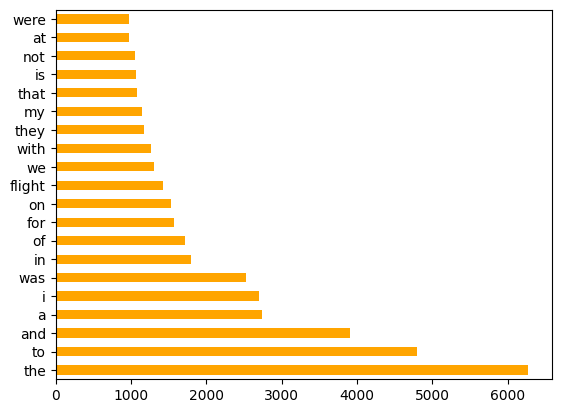

In [50]:
sample = df.sample(1000, random_state=42)
all_words = sample.Review.str.lower().str.split().sum()

pd.Series(all_words).value_counts().head(20).plot.barh(color='orange');

Uhoh! Not what we wanted ... what appears are mostly **stopwords** ... That is, we find on top terms that do not convey information, which is typical. Lists of stopwords for many languages can be found in online sources.

In [51]:
#! pip3 install nltk

In [52]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
len(stop)

198

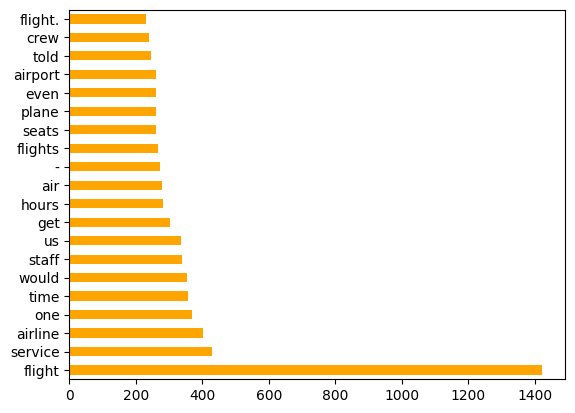

In [53]:
sample = df.sample(1000, random_state=42)
all_words = sample.Review.str.lower().str.split().sum()

# New
filtered_words = [w for w in all_words if w not in stop]
pd.Series(filtered_words).value_counts().head(20).plot.barh(color='orange');

Let's try to plot this as a wordcloud. The beauty and power of python is that - regardless of your objective - you can always find some package that will get close to what you want:

<center>
    <img src='https://raw.githubusercontent.com/ciri/iese-dsfb/main/images/xkcdimport.png' width='50%'>
</center>

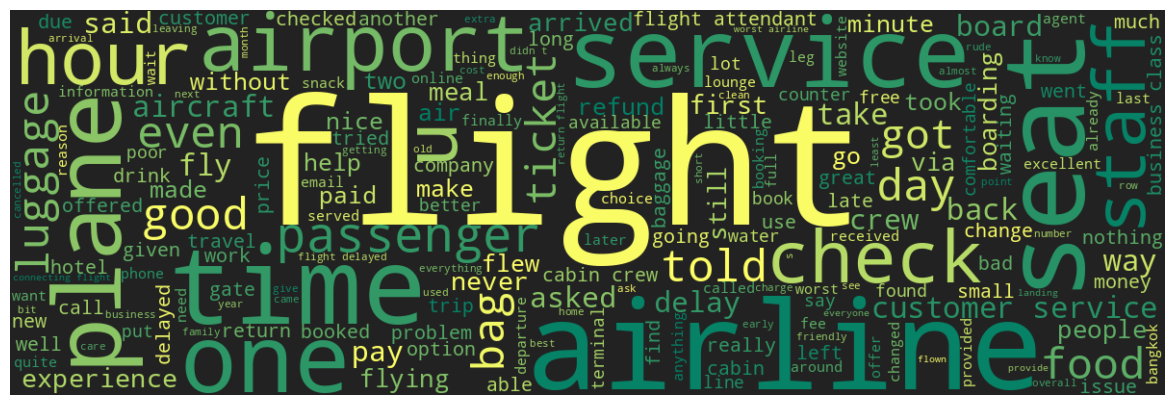

In [54]:
#! pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(filtered_words)
wordcloud = WordCloud(width=1200, height=400, background_color='#222222', colormap='summer').generate(text)

plt.figure(figsize=(15, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The top-term seems to be flight. How often do the reviews include it?

### Sentiment analysis

We start by exploring sentiment through simple keyword checks and then apply a dictionary-based method for a more nuanced, lexicon-based sentiment score.

In [55]:
good = df.Review.str.lower().str.contains('good')
bad  = df.Review.str.lower().str.contains('bad')

print(good.mean(), bad.mean())

0.21608956001041396 0.09767421678382365


In [56]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

# If you are on an old computer, you may need to use the sample instead as this could take a minute or two.
df['sentiment'] = df['Review'].apply(lambda x: sia.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/enric/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


**You try it**

Show the top 2 most positive and negative reviews.

**Litmus test**

This all feels a bit ad-hoc and we should probably validate this with the recommendations to make sure the sentiment makes sense ...

In [57]:
df["Recommended01"] = (df.Recommended == 'yes').astype(int)
df[['sentiment','Recommended01']].corr()

,sentiment,Recommended01
sentiment,1.000000,0.674937
Recommended01,0.674937,1.000000


**BERT**

Not too bad, still, the above method is very crude and can't handle things like negation. We can go beyond that by using machine learning, especially models trained on large datasets of human-labeled text.

One popular family of models is BERT (Bidirectional Encoder Representations from Transformers). Unlike traditional models that read text from left to right (or right to left), BERT reads both directions at once — capturing richer context. 

BERT models have been fine-tuned for tasks like:
* Sentiment analysis
* Text classification

If you have a powerful machine, you could try [this one](https://huggigface.co/cirimus/modernbert-base-go-emotions), created by your professor. It's trained to recognize a wide range of emotions in modern language.

But for now, let's keep it simple with a lightweight version of BERT, already fine-tuned for sentiment:
`distilbert-base-uncased-finetuned-sst-2-english`. It's fast, free to use, and good enough to show the power of transformer models over rule-based methods.

In [58]:
#! pip install transformers
from transformers import pipeline

# Lightweight BERT-based sentiment analyzer
sentiment_model = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english",
    tokenizer="distilbert-base-uncased-finetuned-sst-2-english",
    truncation=True,
    max_length=512
)
def scored_sentiment(text):
    result = sentiment_model(text)[0]
    return result['score'] if result['label'] == 'POSITIVE' else -result['score']

# Apply to reviews (limit size if needed)
sample['bert_sentiment'] = sample['Review'].apply(scored_sentiment)

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [59]:
sample["Recommended01"] = (sample.Recommended == 'yes').astype(int)
sample[['bert_sentiment','Recommended01']].corr()

,bert_sentiment,Recommended01
bert_sentiment,1.000000,0.728788
Recommended01,0.728788,1.000000


### Who are the Stars in Star Alliance?

Now that we have the sentiment, let us try to rank airlines by sentiment.

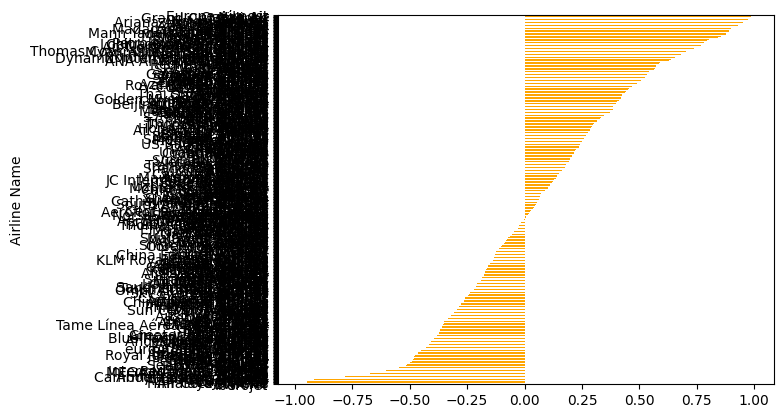

In [60]:
df.groupby('Airline Name')['sentiment'].mean().sort_values(ascending=True).plot.barh(color='orange');

For the sake of our analysis, let us drop any airline company with less than 10 reviews. Instead, we may just analyze star alliance airline companies:

In [61]:
# I asked ChatGPT to write this code for me
star_alliance_members = [
    'Aegean Airlines',
    'Air Canada',
    'Air China',
    'Air India',
    'ANA All Nippon Airways',
    'Asiana Airlines',
    'Austrian Airlines',
    'Avianca',
    'Brussels Airlines',
    'Copa Airlines',
    'Croatia Airlines',
    'Egyptair',
    'Ethiopian Airlines',
    'Eva Air',
    'LOT Polish Airlines',
    'Lufthansa',
    'Scandinavian Airlines',
    'Shenzhen Airlines',
    'Singapore Airlines',
    'South African Airways',
    'Swiss International Air Lines',
    'TAP Portugal',
    'Thai Airways',
    'Turkish Airlines',
    'United Airlines'
]

In [62]:
f_star_alliance = df['Airline Name'].isin(star_alliance_members)
df_star = df[f_star_alliance].copy()

star_sentiments = df_star.groupby('Airline Name')[['sentiment']].agg(['count','mean'])
star_sentiments

sentiment          
                           count      mean
Airline Name                              
ANA All Nippon Airways       100  0.630785
Aegean Airlines              100  0.062939
Air Canada                   100 -0.371186
Air China                    100 -0.098794
Air India                    100 -0.228691
Asiana Airlines              100  0.511564
Austrian Airlines            100 -0.313518
Avianca                      100 -0.542705
Brussels Airlines            100 -0.189106
Copa Airlines                100 -0.358930
Croatia Airlines              90  0.220506
Egyptair                     100 -0.304798
Ethiopian Airlines           100 -0.008984
LOT Polish Airlines          100 -0.203913
Lufthansa                    100 -0.262028
Shenzhen Airlines             42  0.063062
Singapore Airlines           100  0.258994
South African Airways        100  0.052384
TAP Portugal                 100 -0.366308
Thai Airways                 100  0.039378
Turkish Airlines             100 -0.220092
United Airlines              100 -0.257786

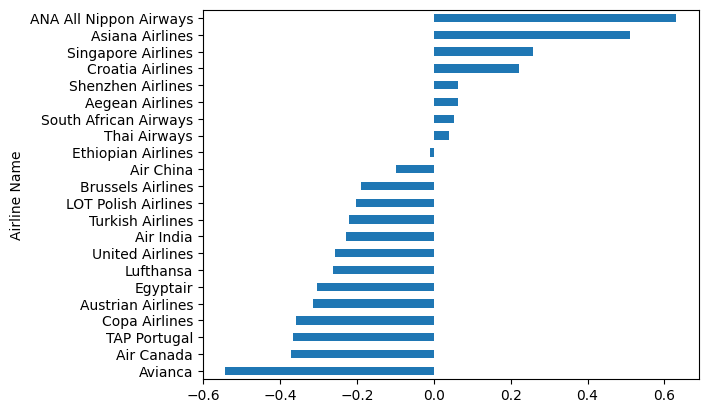

In [63]:
star_sentiments[('sentiment','mean')].sort_values().plot.barh();

What follow-up analysis would you do if you were working at star alliance?

# BONUS: Topic Modeling

We probably won't have time to go over this in class, but here's a more advanced method for topic modeling that's very popular in marketing: Latent Dirichlet Allocation (LDA).

LDA is an unsupervised machine learning technique that helps discover topics hidden in a large collection of text. It assumes each document is a mix of topics, and each topic is a mix of words. The output below shows the top words that define each topic, along with their importance (weights).

Example output:

```
Topic 0: 0.019*"seats" + 0.018*"seat" + 0.017*"flight" + 0.012*"food" + 0.008*"class"
```

This means Topic 0 likely relates to seating and in-flight experience. The weights show how representative each word is of the topic.

By interpreting topics, we can quickly understand major themes in reviews: boarding issues, customer service, or refund problems and use this for market insights or operational improvements.

In [40]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Tokenize and clean just the reviews of people who did NOT recommend the airline.
sample = df[df.Recommended == 'no']
texts  = sample.Review.str.lower().apply(word_tokenize)

# I am not interested in stopwords or overly generic words so we filter them out here.
stop = set(stopwords.words('english') + ['flight','airline'])
filtered_texts = [[w for w in doc if w.isalpha() and w not in stop] for doc in texts]

# Create dictionary and corpus
dictionary = Dictionary(filtered_texts)
corpus = [dictionary.doc2bow(text) for text in filtered_texts]

# LDA model
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42)

# Print topics
topics = lda.print_topics(num_words=5)
for i, topic in topics:
    print(f"Topic {i}: {topic}")

Topic 0: 0.017*"seat" + 0.017*"seats" + 0.011*"crew" + 0.010*"food" + 0.009*"cabin"
Topic 1: 0.010*"time" + 0.008*"hours" + 0.008*"service" + 0.008*"plane" + 0.008*"staff"
Topic 2: 0.020*"luggage" + 0.015*"pay" + 0.012*"bag" + 0.010*"check" + 0.010*"extra"
Topic 3: 0.012*"refund" + 0.010*"customer" + 0.009*"service" + 0.009*"cancelled" + 0.008*"ticket"
Topic 4: 0.016*"us" + 0.011*"hours" + 0.011*"time" + 0.011*"get" + 0.010*"would"


Alternatively we can use a wordcloud per topic 

<Figure size 640x480 with 0 Axes>

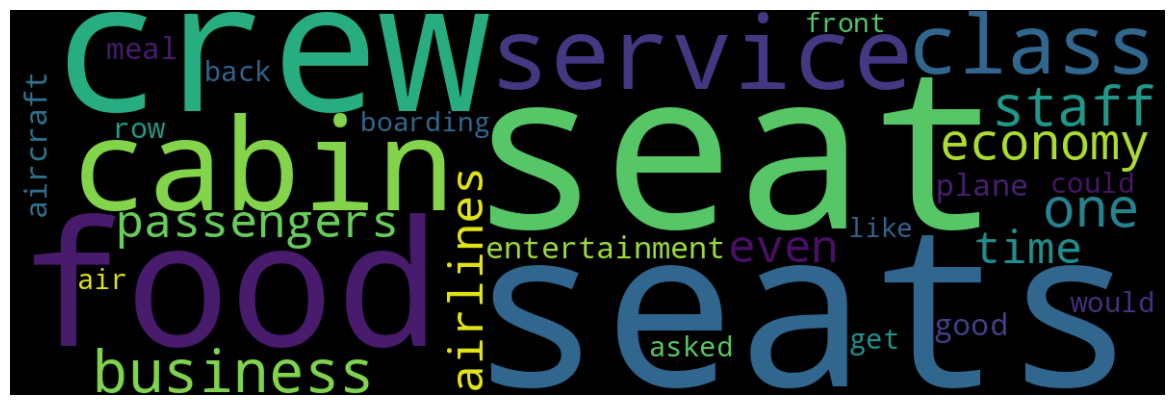

<Figure size 640x480 with 0 Axes>

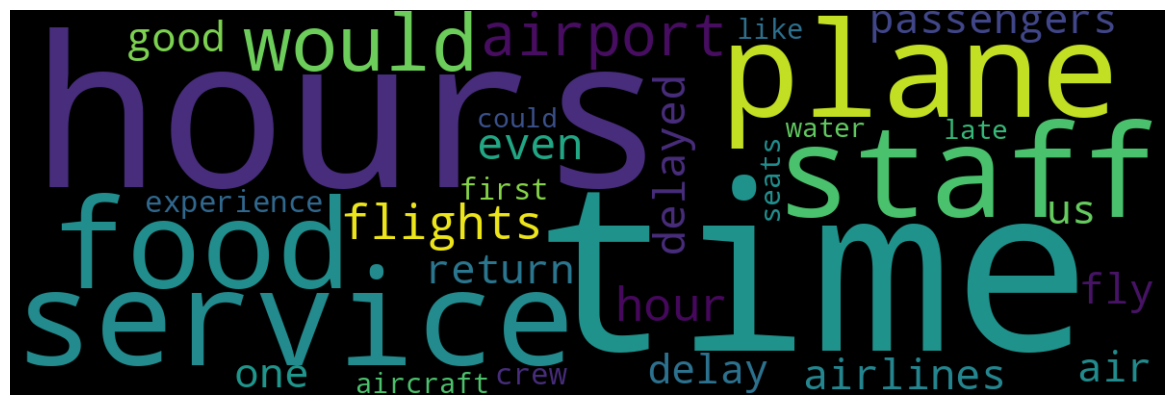

<Figure size 640x480 with 0 Axes>

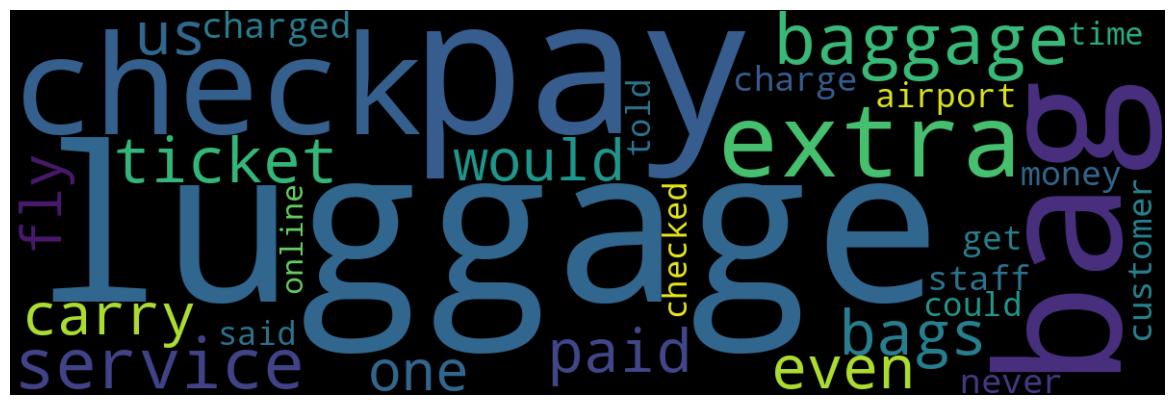

<Figure size 640x480 with 0 Axes>

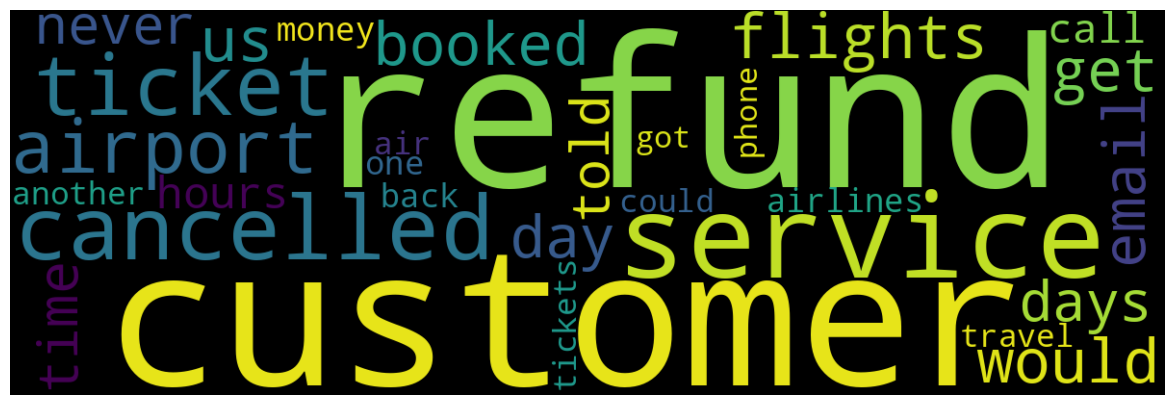

<Figure size 640x480 with 0 Axes>

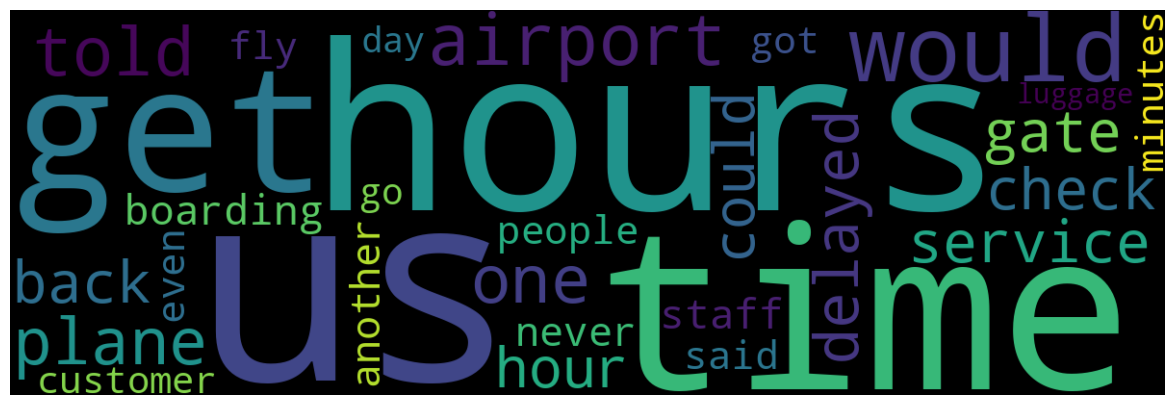

In [47]:
from wordcloud import WordCloud

for i in range(lda.num_topics):
    plt.figure()
    topic_words = dict(lda.show_topic(i, 30))
    wc = WordCloud(width=1200, height=400).generate_from_frequencies(topic_words)

    plt.figure(figsize=(15, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off');
    plt.show();